# How to Get Started With Deep Learning for Computer Vision (7-Day Mini-Course)
https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-computer-vision-7-day-mini-course/
by Jason Brownlee on April 9, 2019 in Deep Learning for Computer Vision
Last Updated on April 2, 2020

# Deep Learning for Computer Vision Crash Course.

# Lesson 01: Deep Learning and Computer Vision

# Lesson 02: Preparing Image Data

In [1]:
# example of pixel normalization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('bondi_beach.jpg')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


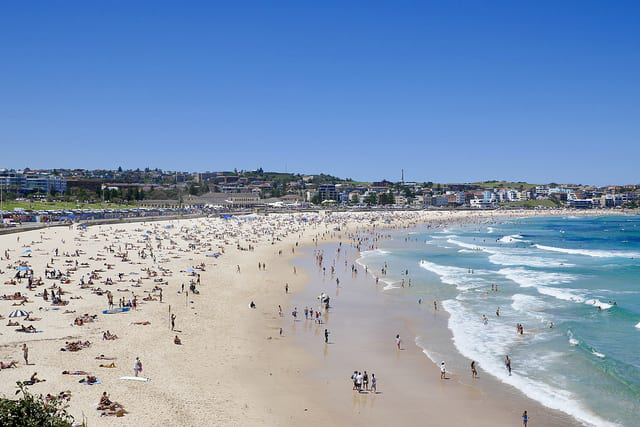

In [2]:
image

In [4]:
pixels1 = asarray(image)
pixels1

array([[[ 49, 106, 195],
        [ 49, 106, 195],
        [ 49, 106, 195],
        ...,
        [ 31,  96, 190],
        [ 31,  96, 190],
        [ 31,  96, 190]],

       [[ 49, 106, 195],
        [ 49, 106, 195],
        [ 49, 106, 195],
        ...,
        [ 31,  96, 190],
        [ 31,  96, 190],
        [ 31,  96, 190]],

       [[ 50, 107, 196],
        [ 50, 107, 196],
        [ 50, 107, 196],
        ...,
        [ 32,  97, 191],
        [ 32,  97, 191],
        [ 32,  97, 191]],

       ...,

       [[  1,   1,   0],
        [  0,   0,   0],
        [ 21,  22,  17],
        ...,
        [133, 151, 153],
        [132, 150, 152],
        [133, 151, 153]],

       [[  3,   3,   3],
        [  0,   0,   0],
        [  0,   1,   0],
        ...,
        [130, 148, 150],
        [130, 148, 150],
        [131, 149, 151]],

       [[  3,   2,   7],
        [  1,   1,   3],
        [  0,   0,   0],
        ...,
        [126, 144, 146],
        [127, 145, 147],
        [129, 147, 149]]

In [6]:
pixels1.min(), pixels1.max()

(0, 255)

In [9]:
(pixels1.astype('float32')/255.0).min(),(pixels1.astype('float32')/255.0).max()

(0.0, 1.0)

# Lesson 03: Convolutional Neural Networks

In [10]:
# cnn with single convolutional, pooling and output layer
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# create model
model = Sequential()
# add convolutional layer
model.add(Conv2D(32, (3,3), input_shape=(256, 256, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 1)                 516129    
                                                                 
Total params: 516,449
Trainable params: 516,449
Non-trainable params: 0
_________________________________________________________________


In [11]:
127*127*32

516128

In [13]:
# cnn with single convolutional, pooling and output layer
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# create model
model = Sequential()
# add convolutional layer
model.add(Conv2D(32, (3,3), input_shape=(256, 256, 1)))
model.add(Conv2D(16, (3,3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 conv2d_2 (Conv2D)           (None, 252, 252, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 254016)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 254017    
                                                                 
Total params: 258,961
Trainable params: 258,961
Non-trainable params: 0
________________________________________________

In [15]:
320+4624+254017

258961

# Lesson 04: Image Classification

In [17]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

49152/35363 [=========================================] - 0s 1us/step
Doberman (35.42%)


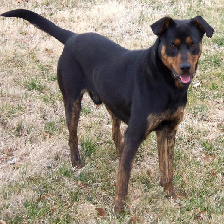

In [35]:
image1 = load_img('dog.jpg', target_size=(224, 224))
image1

In [36]:
image1 = img_to_array(image1)
image1

array([[[207., 187., 162.],
        [207., 187., 163.],
        [198., 180., 160.],
        ...,
        [231., 217., 180.],
        [238., 224., 187.],
        [228., 212., 176.]],

       [[201., 185., 160.],
        [207., 191., 168.],
        [196., 179., 159.],
        ...,
        [222., 210., 172.],
        [221., 209., 171.],
        [225., 211., 174.]],

       [[227., 215., 191.],
        [191., 176., 153.],
        [173., 158., 137.],
        ...,
        [203., 194., 155.],
        [224., 215., 176.],
        [208., 196., 158.]],

       ...,

       [[165., 146., 129.],
        [222., 183., 166.],
        [237., 199., 178.],
        ...,
        [215., 199., 174.],
        [188., 172., 146.],
        [179., 164., 133.]],

       [[150., 133., 113.],
        [177., 140., 122.],
        [205., 168., 150.],
        ...,
        [208., 192., 167.],
        [161., 145., 119.],
        [222., 207., 176.]],

       [[110.,  95.,  74.],
        [144., 108.,  94.],
        [180., 1

In [37]:
image1.shape

(224, 224, 3)

In [38]:
image1 = image1.reshape((1, image1.shape[0], image1.shape[1], image1.shape[2]))
image1

array([[[[207., 187., 162.],
         [207., 187., 163.],
         [198., 180., 160.],
         ...,
         [231., 217., 180.],
         [238., 224., 187.],
         [228., 212., 176.]],

        [[201., 185., 160.],
         [207., 191., 168.],
         [196., 179., 159.],
         ...,
         [222., 210., 172.],
         [221., 209., 171.],
         [225., 211., 174.]],

        [[227., 215., 191.],
         [191., 176., 153.],
         [173., 158., 137.],
         ...,
         [203., 194., 155.],
         [224., 215., 176.],
         [208., 196., 158.]],

        ...,

        [[165., 146., 129.],
         [222., 183., 166.],
         [237., 199., 178.],
         ...,
         [215., 199., 174.],
         [188., 172., 146.],
         [179., 164., 133.]],

        [[150., 133., 113.],
         [177., 140., 122.],
         [205., 168., 150.],
         ...,
         [208., 192., 167.],
         [161., 145., 119.],
         [222., 207., 176.]],

        [[110.,  95.,  74.],
       

In [39]:
image1 = preprocess_input(image1)
image1

array([[[[ 58.060997,  70.221   ,  83.32    ],
         [ 59.060997,  70.221   ,  83.32    ],
         [ 56.060997,  63.221   ,  74.32    ],
         ...,
         [ 76.061   , 100.221   , 107.32    ],
         [ 83.061   , 107.221   , 114.32    ],
         [ 72.061   ,  95.221   , 104.32    ]],

        [[ 56.060997,  68.221   ,  77.32    ],
         [ 64.061   ,  74.221   ,  83.32    ],
         [ 55.060997,  62.221   ,  72.32    ],
         ...,
         [ 68.061   ,  93.221   ,  98.32    ],
         [ 67.061   ,  92.221   ,  97.32    ],
         [ 70.061   ,  94.221   , 101.32    ]],

        [[ 87.061   ,  98.221   , 103.32    ],
         [ 49.060997,  59.221   ,  67.32    ],
         [ 33.060997,  41.221   ,  49.32    ],
         ...,
         [ 51.060997,  77.221   ,  79.32    ],
         [ 72.061   ,  98.221   , 100.32    ],
         [ 54.060997,  79.221   ,  84.32    ]],

        ...,

        [[ 25.060997,  29.221   ,  41.32    ],
         [ 62.060997,  66.221   ,  98.32    ]

In [40]:
# Already load the model
#model = VGG16()

yhat1 = model.predict(image1)
yhat1

array([[1.66008874e-07, 9.97113432e-08, 2.96097511e-07, 2.67804552e-07,
        1.02976503e-06, 3.28556865e-07, 2.17557727e-07, 8.23669416e-06,
        5.86880924e-06, 7.40113592e-07, 1.02812280e-07, 1.62104357e-07,
        1.88525235e-07, 1.96122741e-07, 8.26164467e-07, 3.51851440e-06,
        1.30165247e-07, 1.60356967e-06, 8.71319571e-07, 9.25965935e-08,
        1.12330326e-07, 3.62784192e-07, 5.43113458e-07, 1.37673385e-06,
        4.00535498e-07, 2.12144914e-06, 2.03192531e-06, 2.31136119e-06,
        2.63117727e-06, 6.92839876e-07, 1.53520219e-07, 4.25614644e-07,
        2.97003083e-07, 2.09891311e-07, 2.22353407e-07, 2.61037400e-07,
        2.99760160e-07, 2.11239262e-06, 4.37331323e-07, 3.44379799e-07,
        7.20614764e-07, 5.39758219e-07, 4.64987465e-07, 2.11095951e-07,
        8.06367780e-07, 2.07707316e-07, 7.90162176e-07, 3.35637651e-07,
        2.17320689e-07, 3.67307450e-07, 9.06004800e-07, 3.56702230e-07,
        3.00622418e-07, 8.87625674e-07, 9.27210635e-07, 3.234615

In [44]:
label1 = decode_predictions(yhat1)
label1

[[('n02107142', 'Doberman', 0.35419115),
  ('n02105412', 'kelpie', 0.19439045),
  ('n02106550', 'Rottweiler', 0.16862364),
  ('n02089078', 'black-and-tan_coonhound', 0.13516638),
  ('n02107312', 'miniature_pinscher', 0.038150016)]]

In [45]:
# retrieve the most likely result, e.g. highest probability
label1 = label1[0][0]
label1

('n02107142', 'Doberman', 0.35419115)

In [46]:
print('%s (%.2f%%)' % (label[1], label[2]*100))

Doberman (35.42%)


# Lesson 05: Train Image Classification Model

In [48]:
# fit a cnn on the fashion mnist dataset
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# convert from integers to floats
trainX, testX = trainX.astype('float32'), testX.astype('float32')
# normalize to range 0-1
trainX,testX  = trainX / 255.0, testX / 255.0
# one hot encode target values
trainY, testY = to_categorical(trainY), to_categorical(testY)
# define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit model
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)
# evaluate model
loss, acc = model.evaluate(testX, testY, verbose=0)
print(loss, acc)

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 - 19s - loss: 0.3749 - accuracy: 0.8659 - 19s/epoch - 10ms/step
Epoch 2/10
1875/1875 - 16s - loss: 0.2512 - accuracy: 0.9083 - 16s/epoch - 9ms/step
Epoch 3/10
1875/1875 - 16s - loss: 0.2069 - accuracy: 0.9232 - 16s/epoch - 9ms/step
Epoch 4/10
1875/1875 - 12s - loss: 0.1732 - accuracy: 0.9373 - 12s/epoch - 7ms/step
Epoch 5/10
1875/1875 - 11s - loss: 0.1497 - accuracy: 0.9440 - 11s/epoch - 6ms/step
Epoch 6/10
1875/1875 - 11s - loss: 0.1256 - accuracy: 0.9531 - 11s/epoch - 6ms/step
Epoch 7/10
1875/1875 - 11s - loss: 0.1071 - accuracy: 0.9612 - 11s/epoch - 6ms/step
Epoch 8/10
1875/1875 - 11s - loss: 0.0925 - accuracy: 0.9650 - 11s/epoch - 6ms/step
Epoch 9/10
1875/1875 - 16s - loss: 0.0775 - accuracy: 0.9718 - 16s/epoch - 9ms/step
Epoch 10/10
1875/1875 - 13s - loss: 0.0674 - accuracy: 0.9757 - 13s/epoch - 7ms/step
0.32127776741981506 0.9154000282287598


In [49]:
print('%s: (%.2f%%) %s: (%.2f%%)' % ("loss", loss*100,"accuracy", acc*100))

loss: (32.13%) accuracy: (91.54%)


# Lesson 06: Image Augmentation

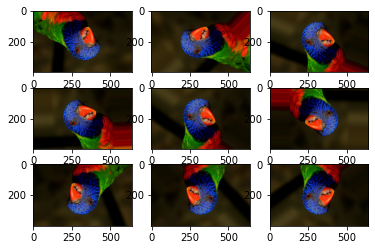

In [53]:
# example using image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
     # define subplot
     pyplot.subplot(330 + 1 + i)
     # generate batch of images
     batch = it.next()
     # convert to unsigned integers for viewing
     image = batch[0].astype('uint32')
     # plot raw pixel data
     pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
Your Task
Your task in this lesson is to run the example and report the effect that the image augmentation has had on the original image.

For bonus points, try additional types of image augmentation, supported by the ImageDataGenerator class.

Post your findings in the comments below. I would love to see what you find.

In the next lesson, you will discover how to use a deep convolutional network to detect faces in photographs.

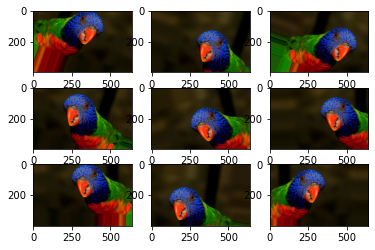

In [56]:
# example using image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True, rotation_range=20, width_shift_range=0.2,
                                height_shift_range=0.2,horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
     # define subplot
     pyplot.subplot(330 + 1 + i)
     # generate batch of images
     batch = it.next()
     # convert to unsigned integers for viewing
     image = batch[0].astype('uint32')
     # plot raw pixel data
     pyplot.imshow(image)
# show the figure
pyplot.show()

# Lesson 07: Face Detection

In [59]:
!pip install mtcnn

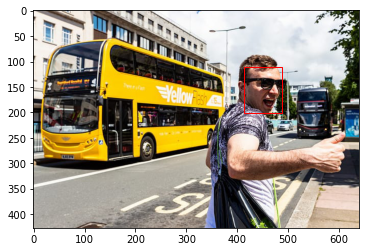

In [60]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
# load image from file
pixels = pyplot.imread('street.jpg')
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# plot the image
pyplot.imshow(pixels)
# get the context for drawing boxes
ax = pyplot.gca()
# get coordinates from the first face
x, y, width, height = faces[0]['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
ax.add_patch(rect)
# show the plot
pyplot.show()

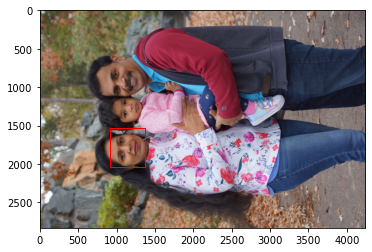

In [62]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
# load image from file
pixels = pyplot.imread('DSC06849.jpg')
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# plot the image
pyplot.imshow(pixels)
# get the context for drawing boxes
ax = pyplot.gca()
# get coordinates from the first face
x, y, width, height = faces[0]['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
ax.add_patch(rect)
# show the plot
pyplot.show()

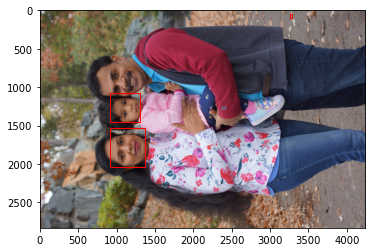

In [68]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
# load image from file
pixels = pyplot.imread('DSC06849.jpg')
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# plot the image
pyplot.imshow(pixels)
# get the context for drawing boxes
ax = pyplot.gca()
# get coordinates from the first face
x, y, width, height = faces[0]['box']
# create the shape
rect1 = Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
ax.add_patch(rect1)
# get coordinates from the second face
x, y, width, height = faces[1]['box']
# create the shape
rect2 = Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
ax.add_patch(rect2)
# get coordinates from the third face
x, y, width, height = faces[2]['box']
# create the shape
rect3 = Rectangle((x, y), width, height, fill=False, color='red')
# draw the box
ax.add_patch(rect3)
# show the plot
pyplot.show()

In [ ]:
#failed to distinguish thord face from the second and could not detect the third face